In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.4/910.4 kB 11.9 MB/s eta 0:00:00


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="td3YJvQeH8xdPje9B2Ji")
project = rf.workspace("team-roboflow").project("coco-128")
version = project.version(2)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to COCO-128-2 in yolov11:: 100%|██████████| 768/768 [00:00<00:00, 6532.57it/s]


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
dataset.location

'/content/COCO-128-2'

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11m.pt" epochs=100 imgsz=640

100% 38.8M/38.8M [00:00<00:00, 313MB/s]
Ultralytics 8.3.64 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/content/COCO-128-2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, 

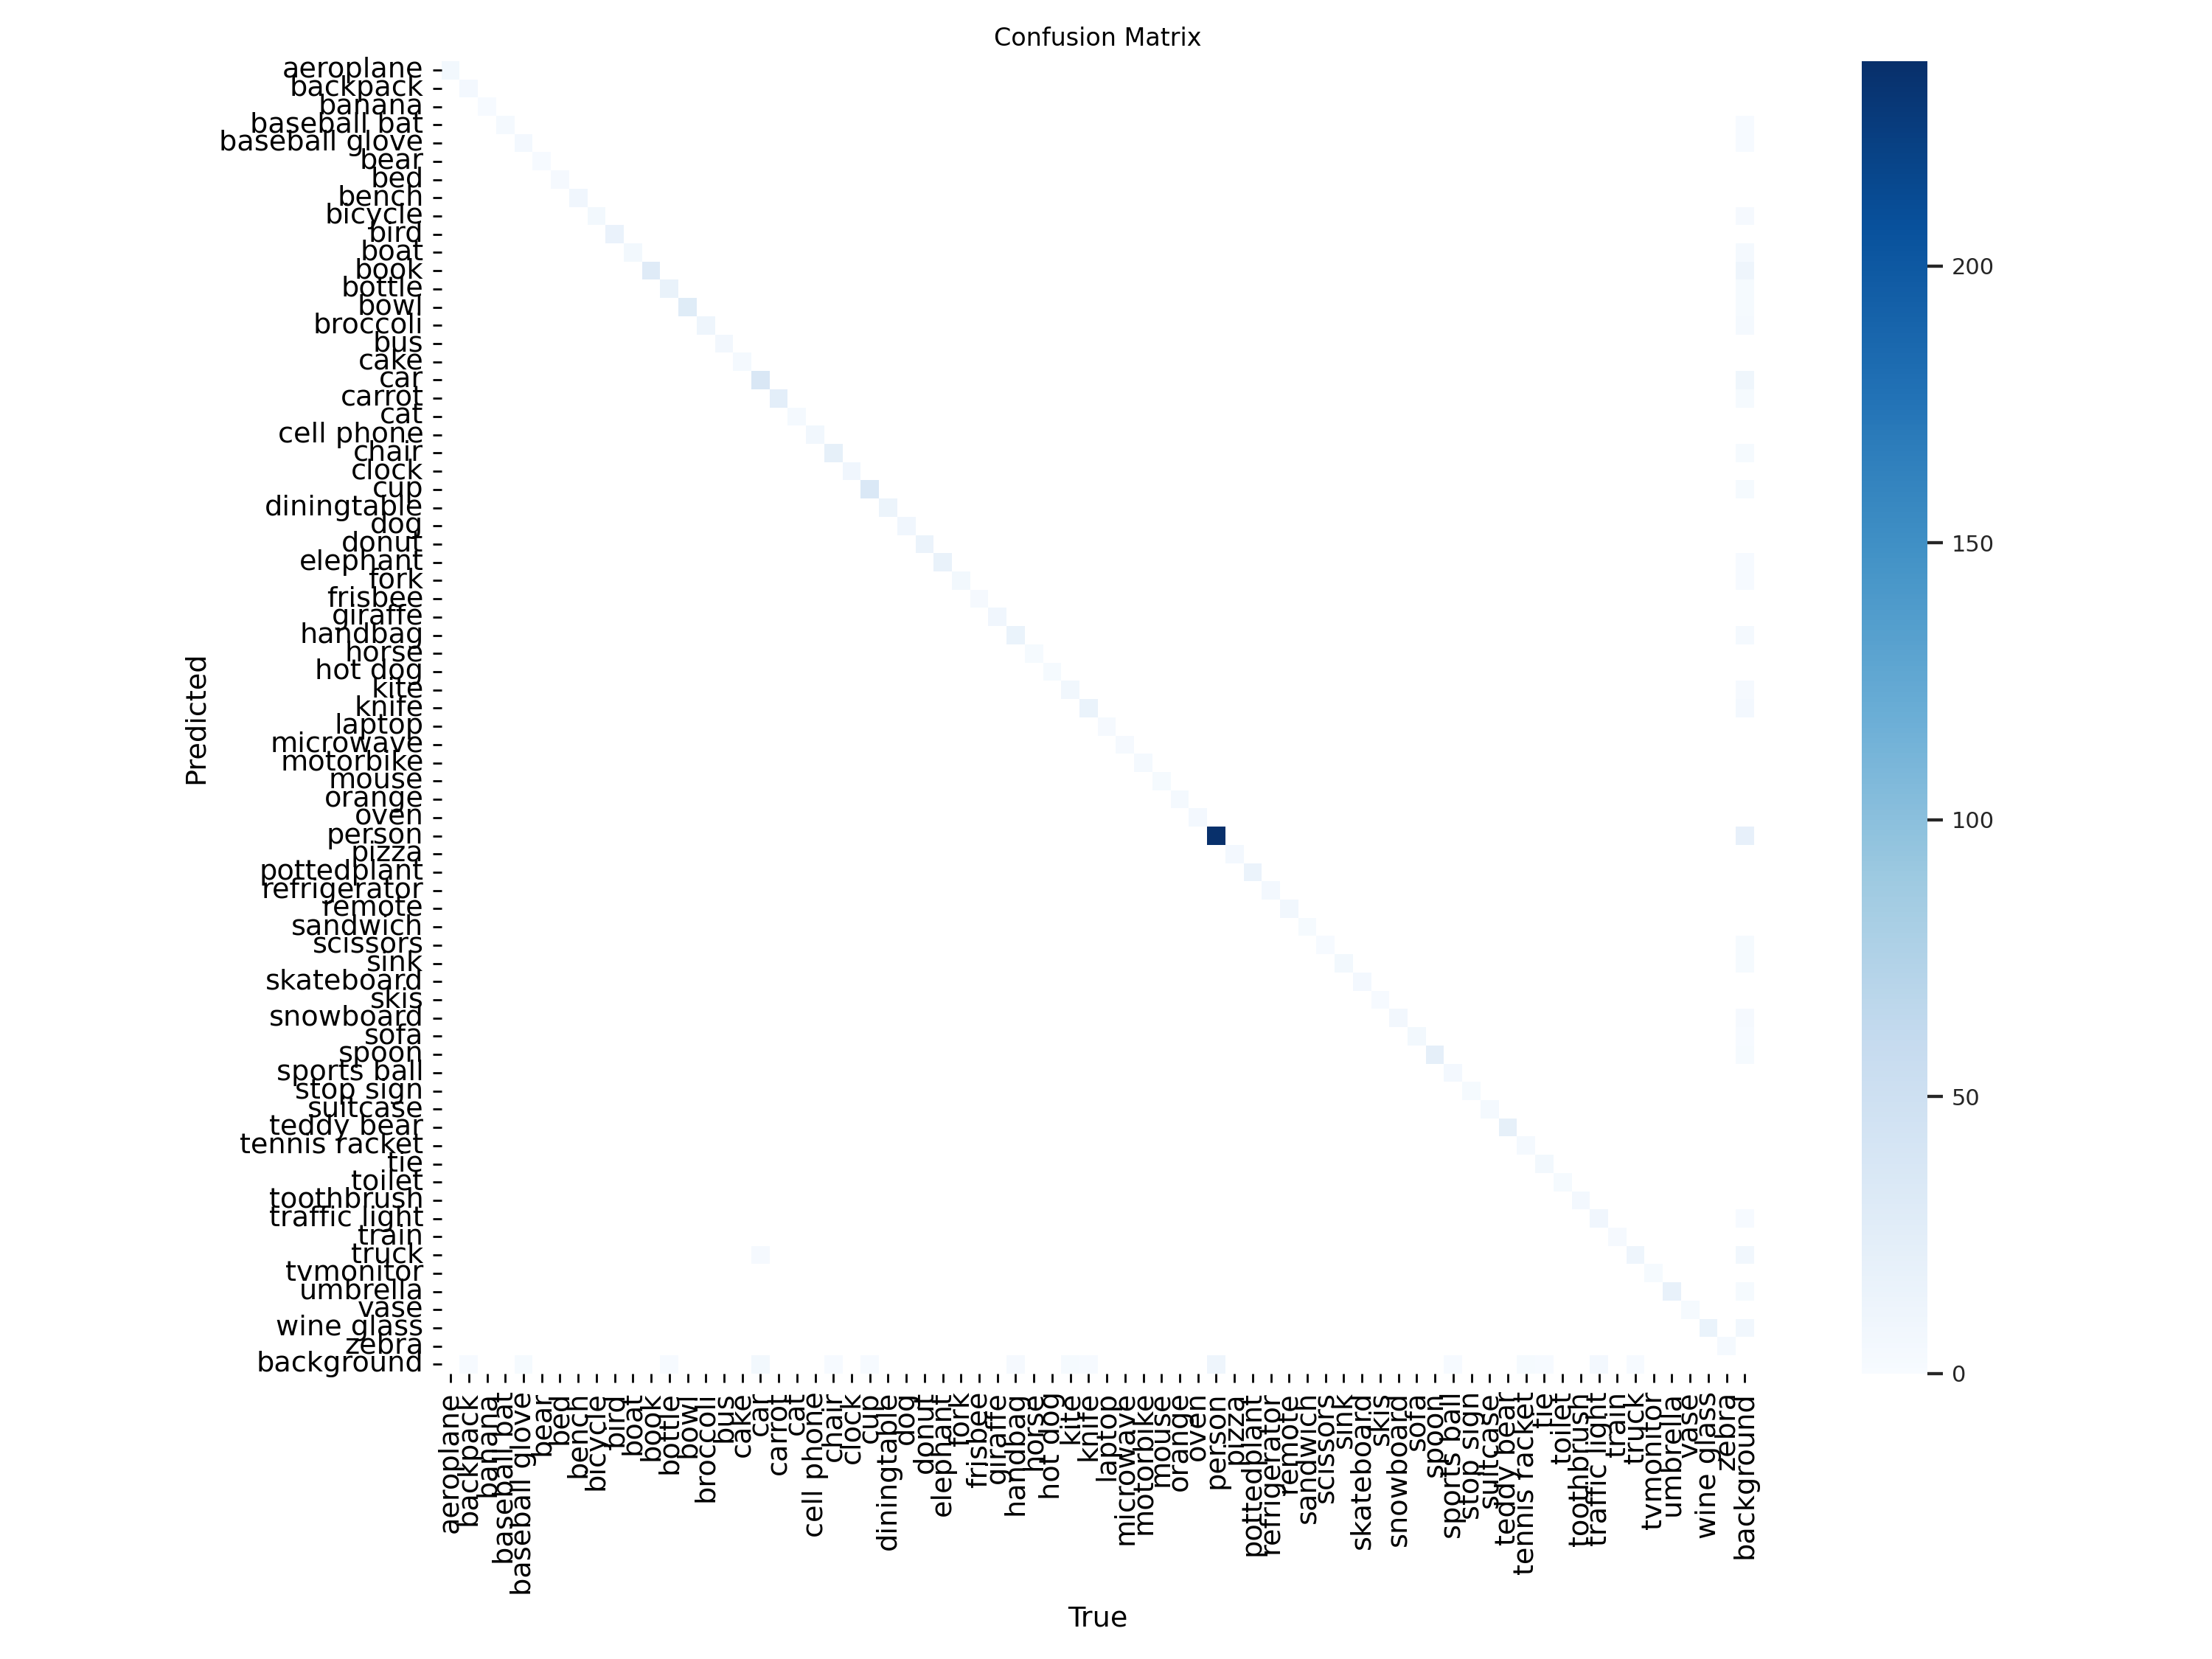

In [ ]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

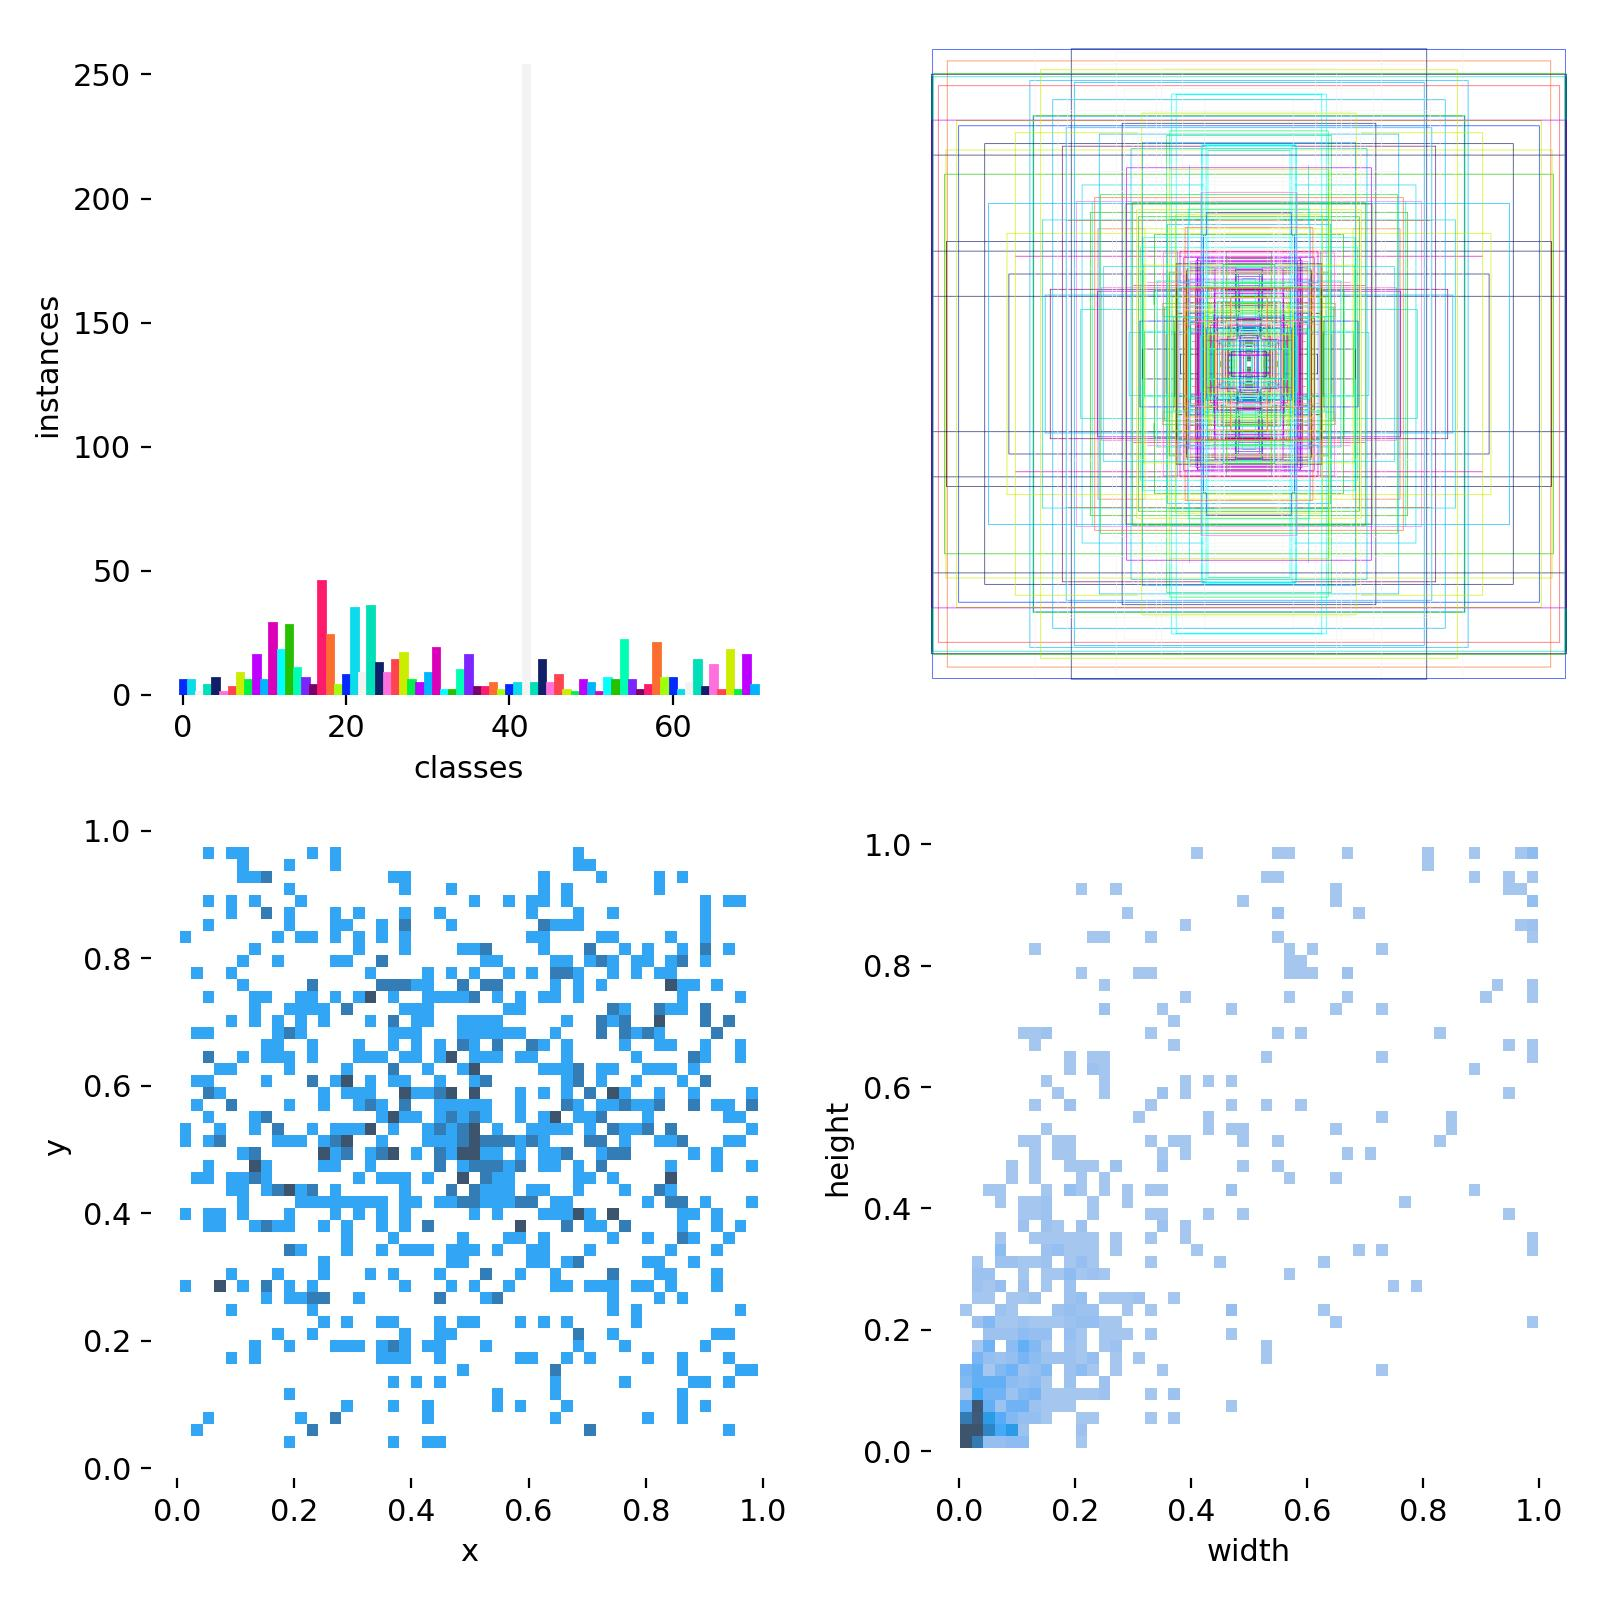

In [ ]:
Image("/content/runs/detect/train/labels.jpg", width=600)


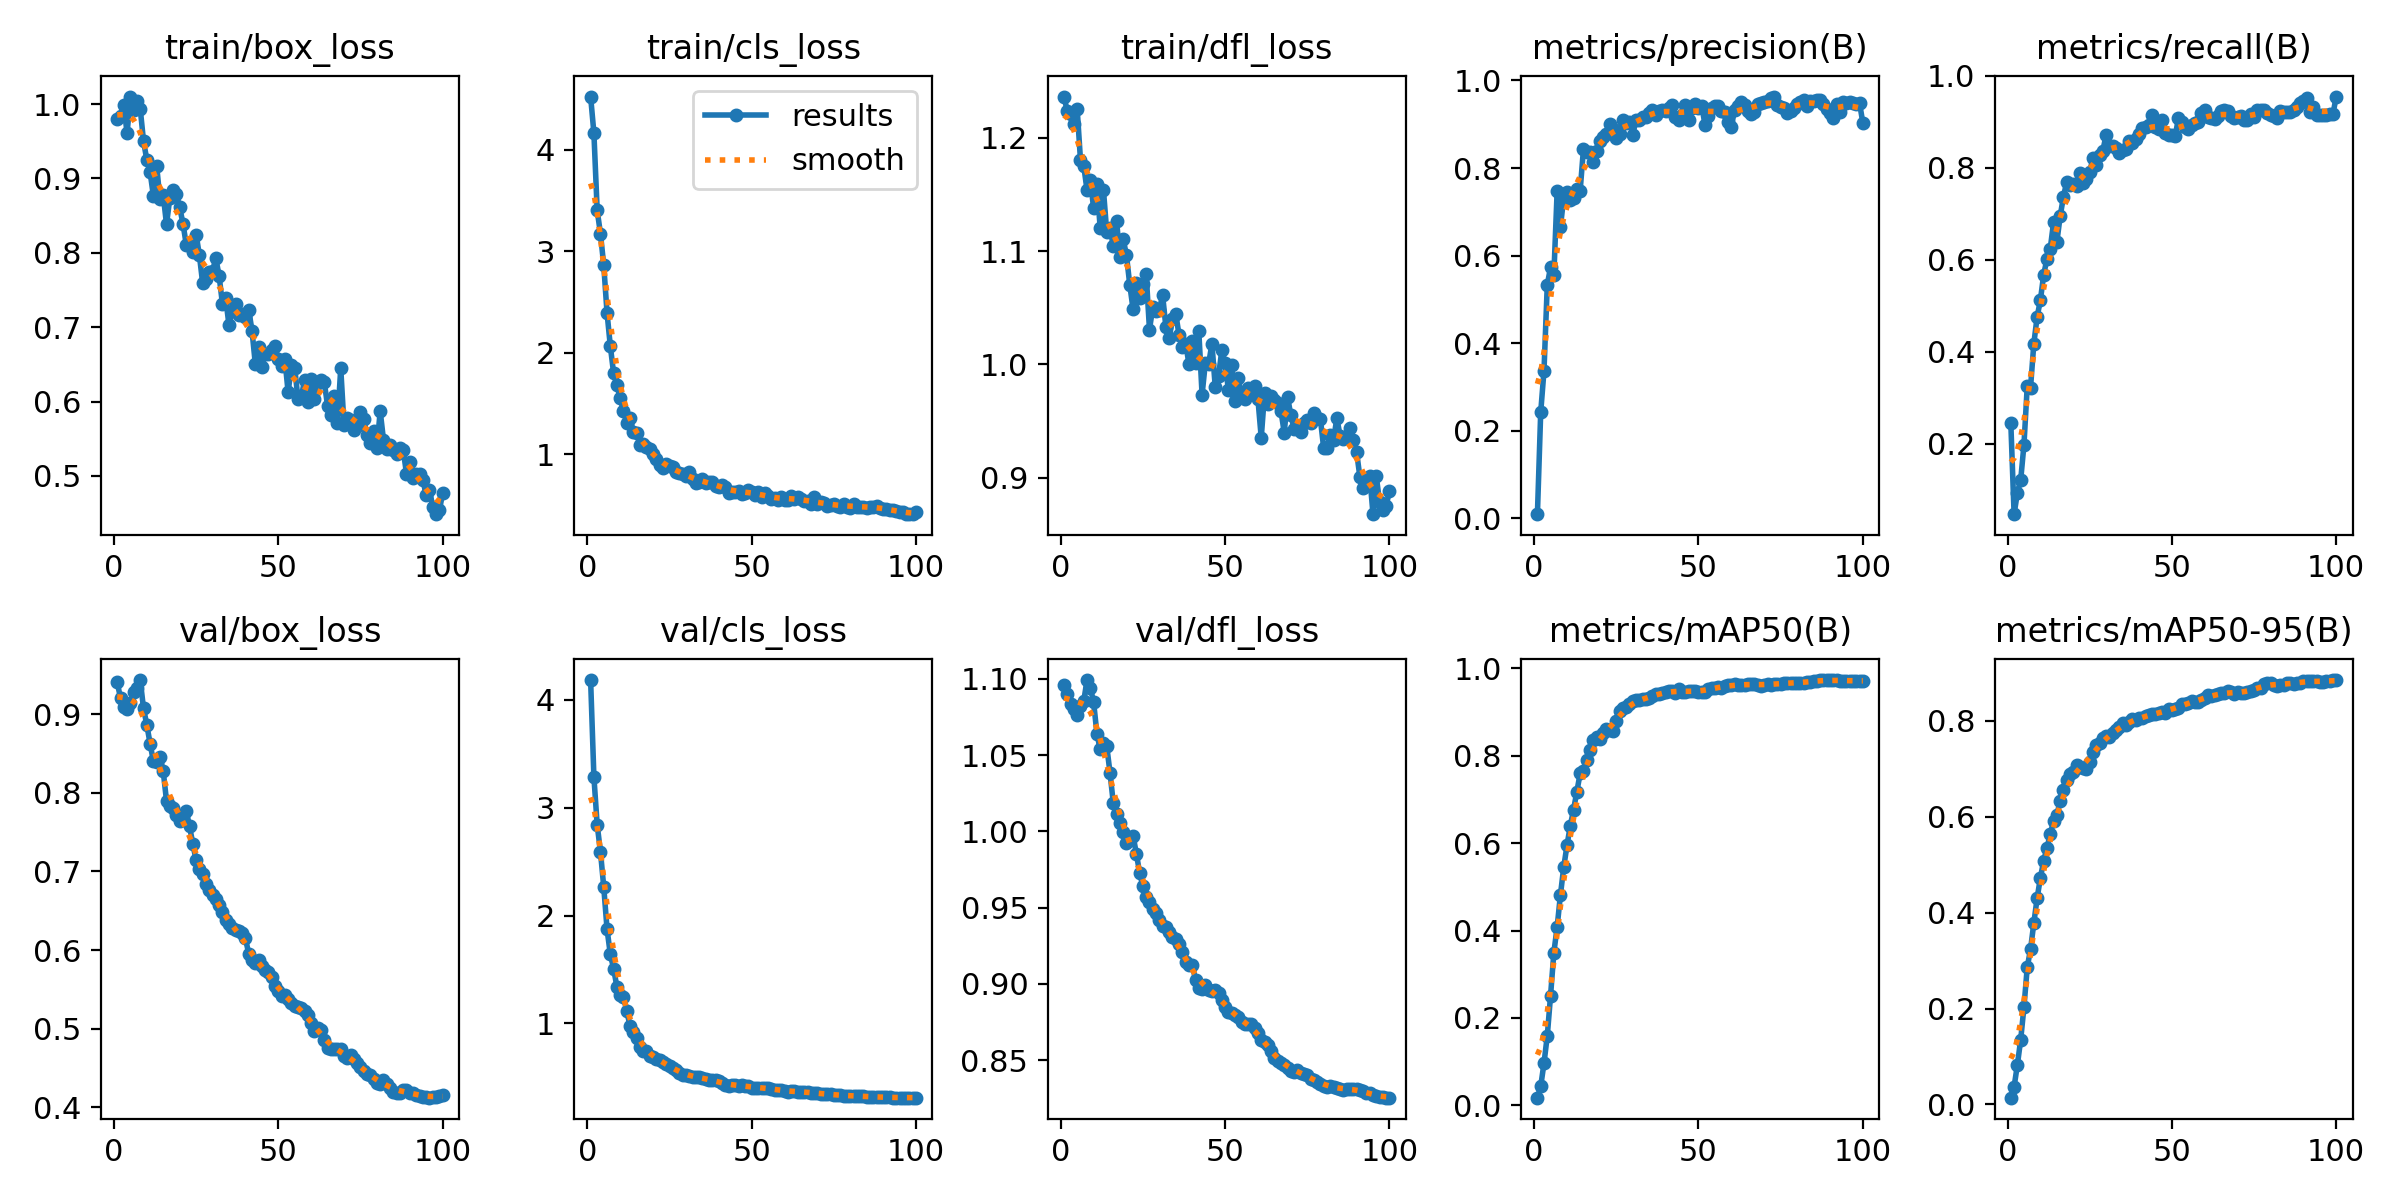

In [ ]:
Image("/content/runs/detect/train/results.png", width=600)

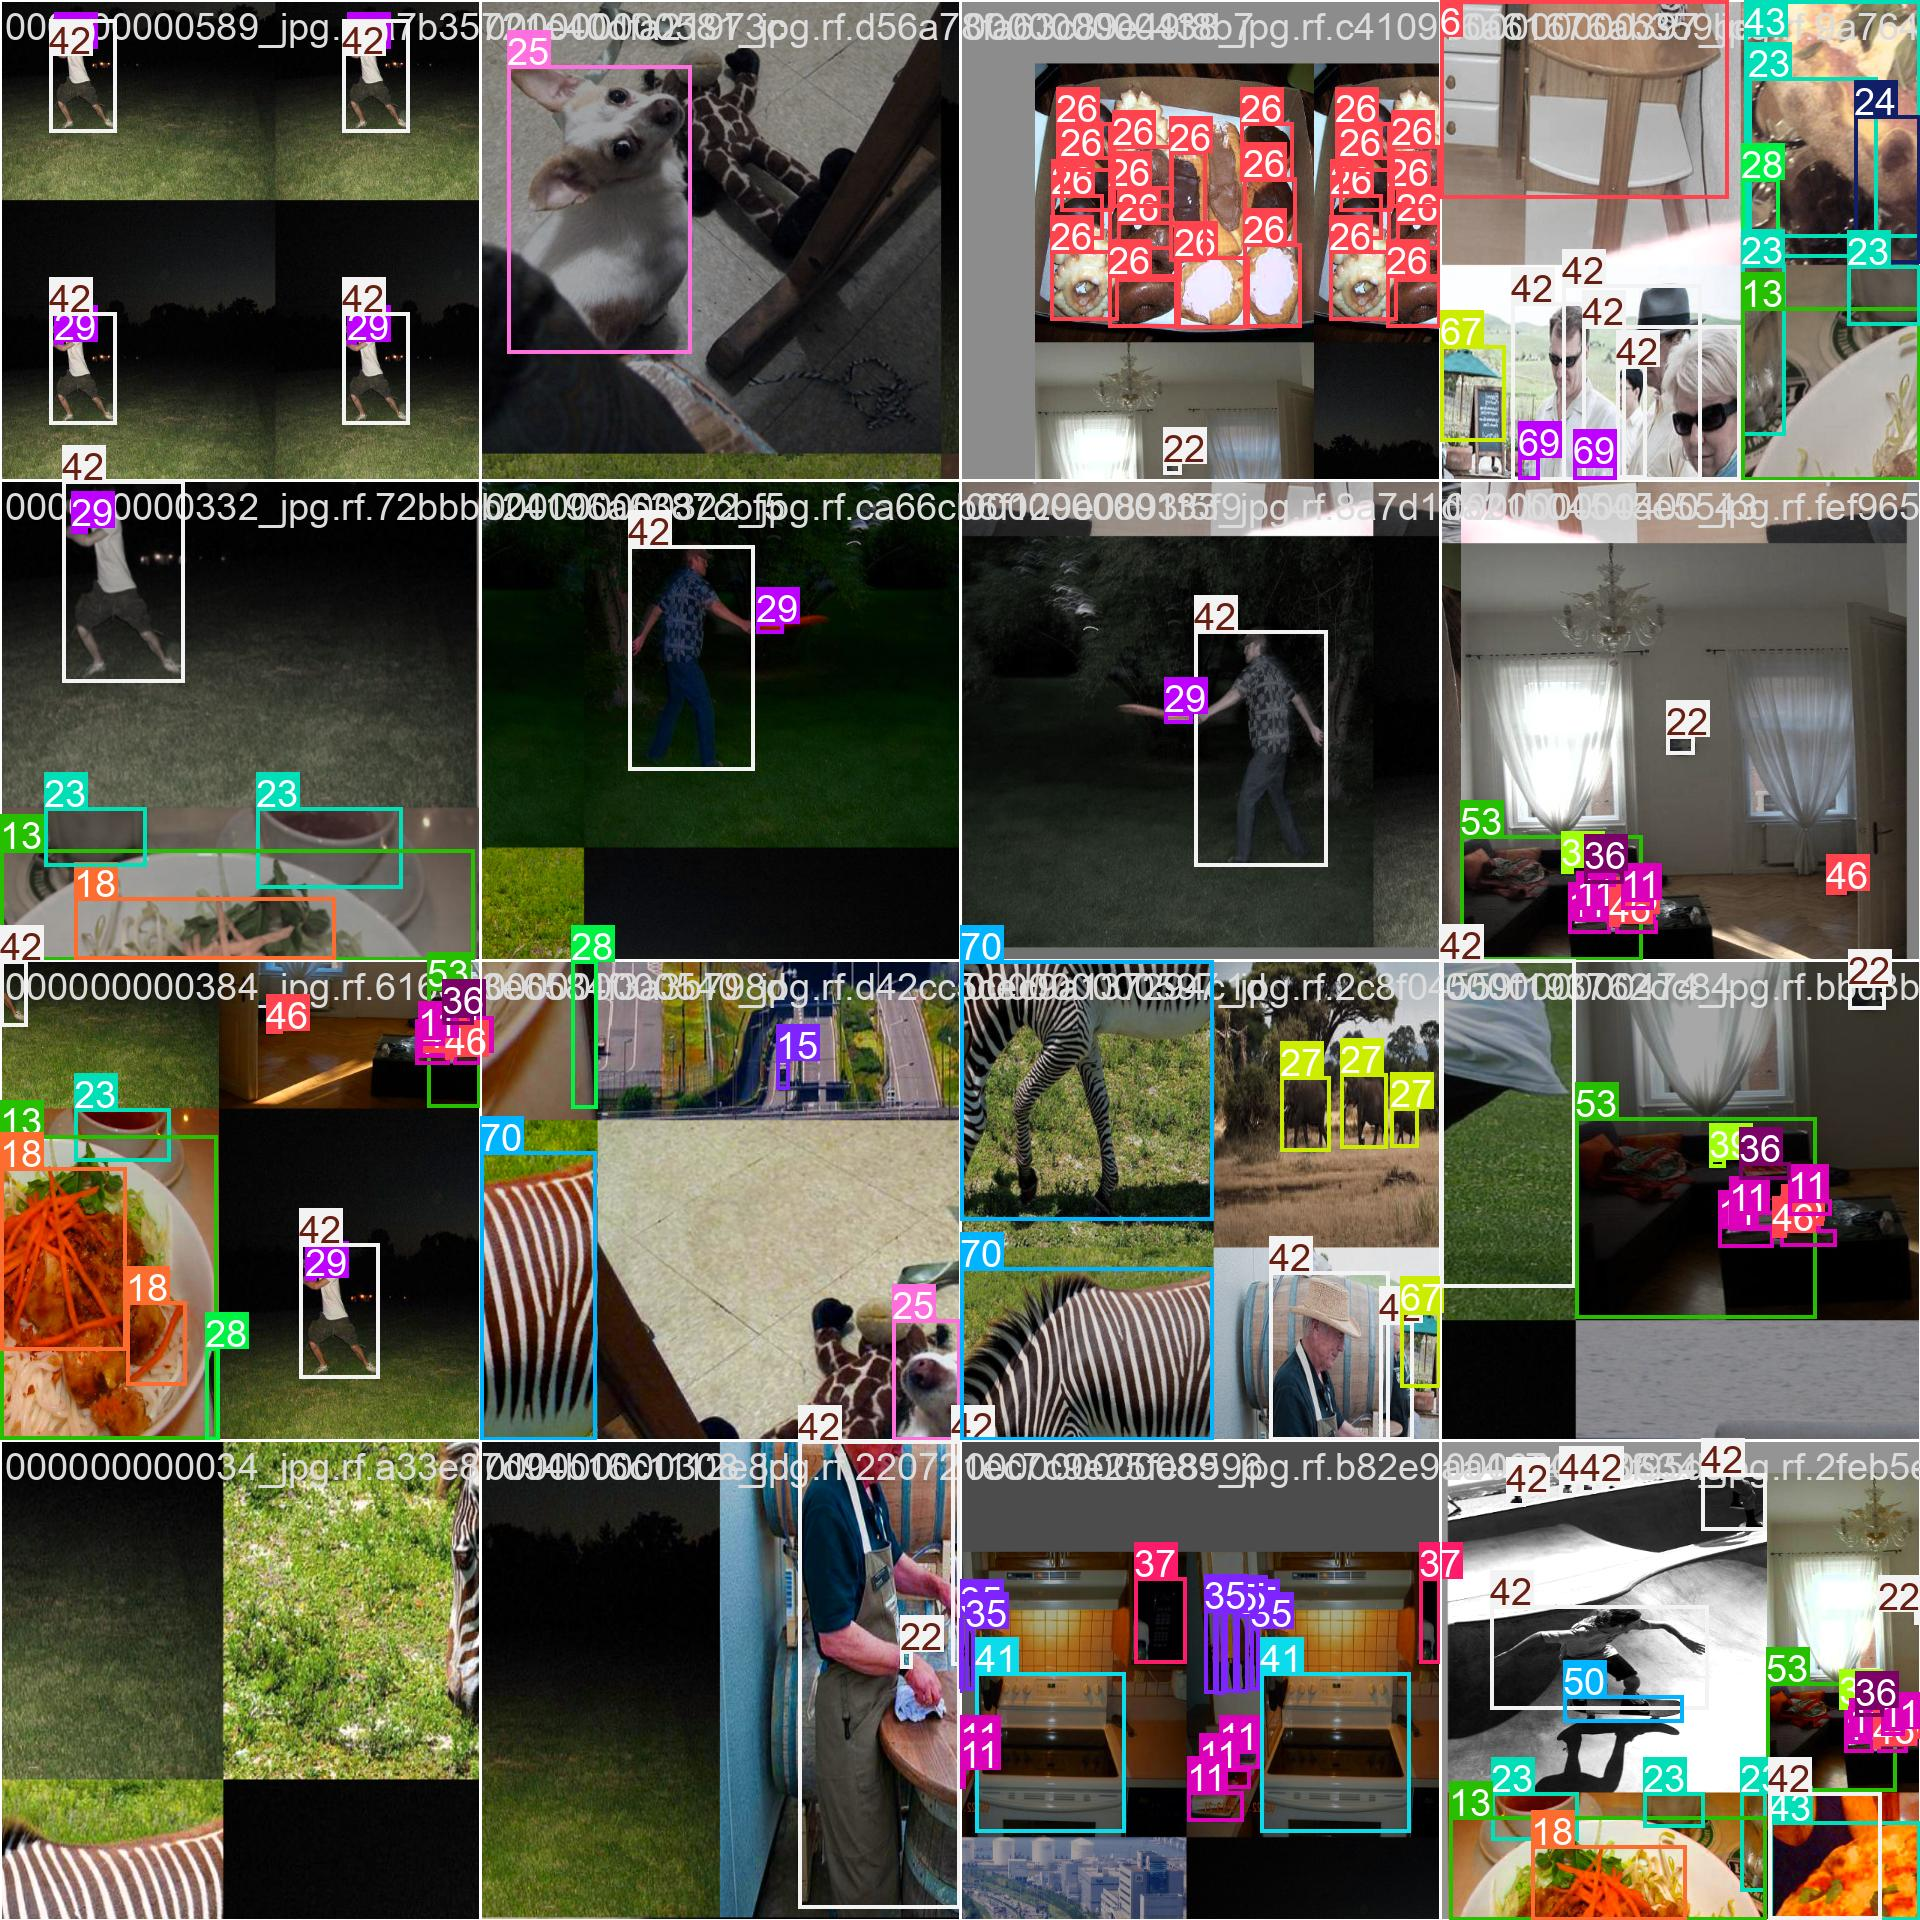

In [ ]:
Image("/content/runs/detect/train/train_batch0.jpg", width=800)


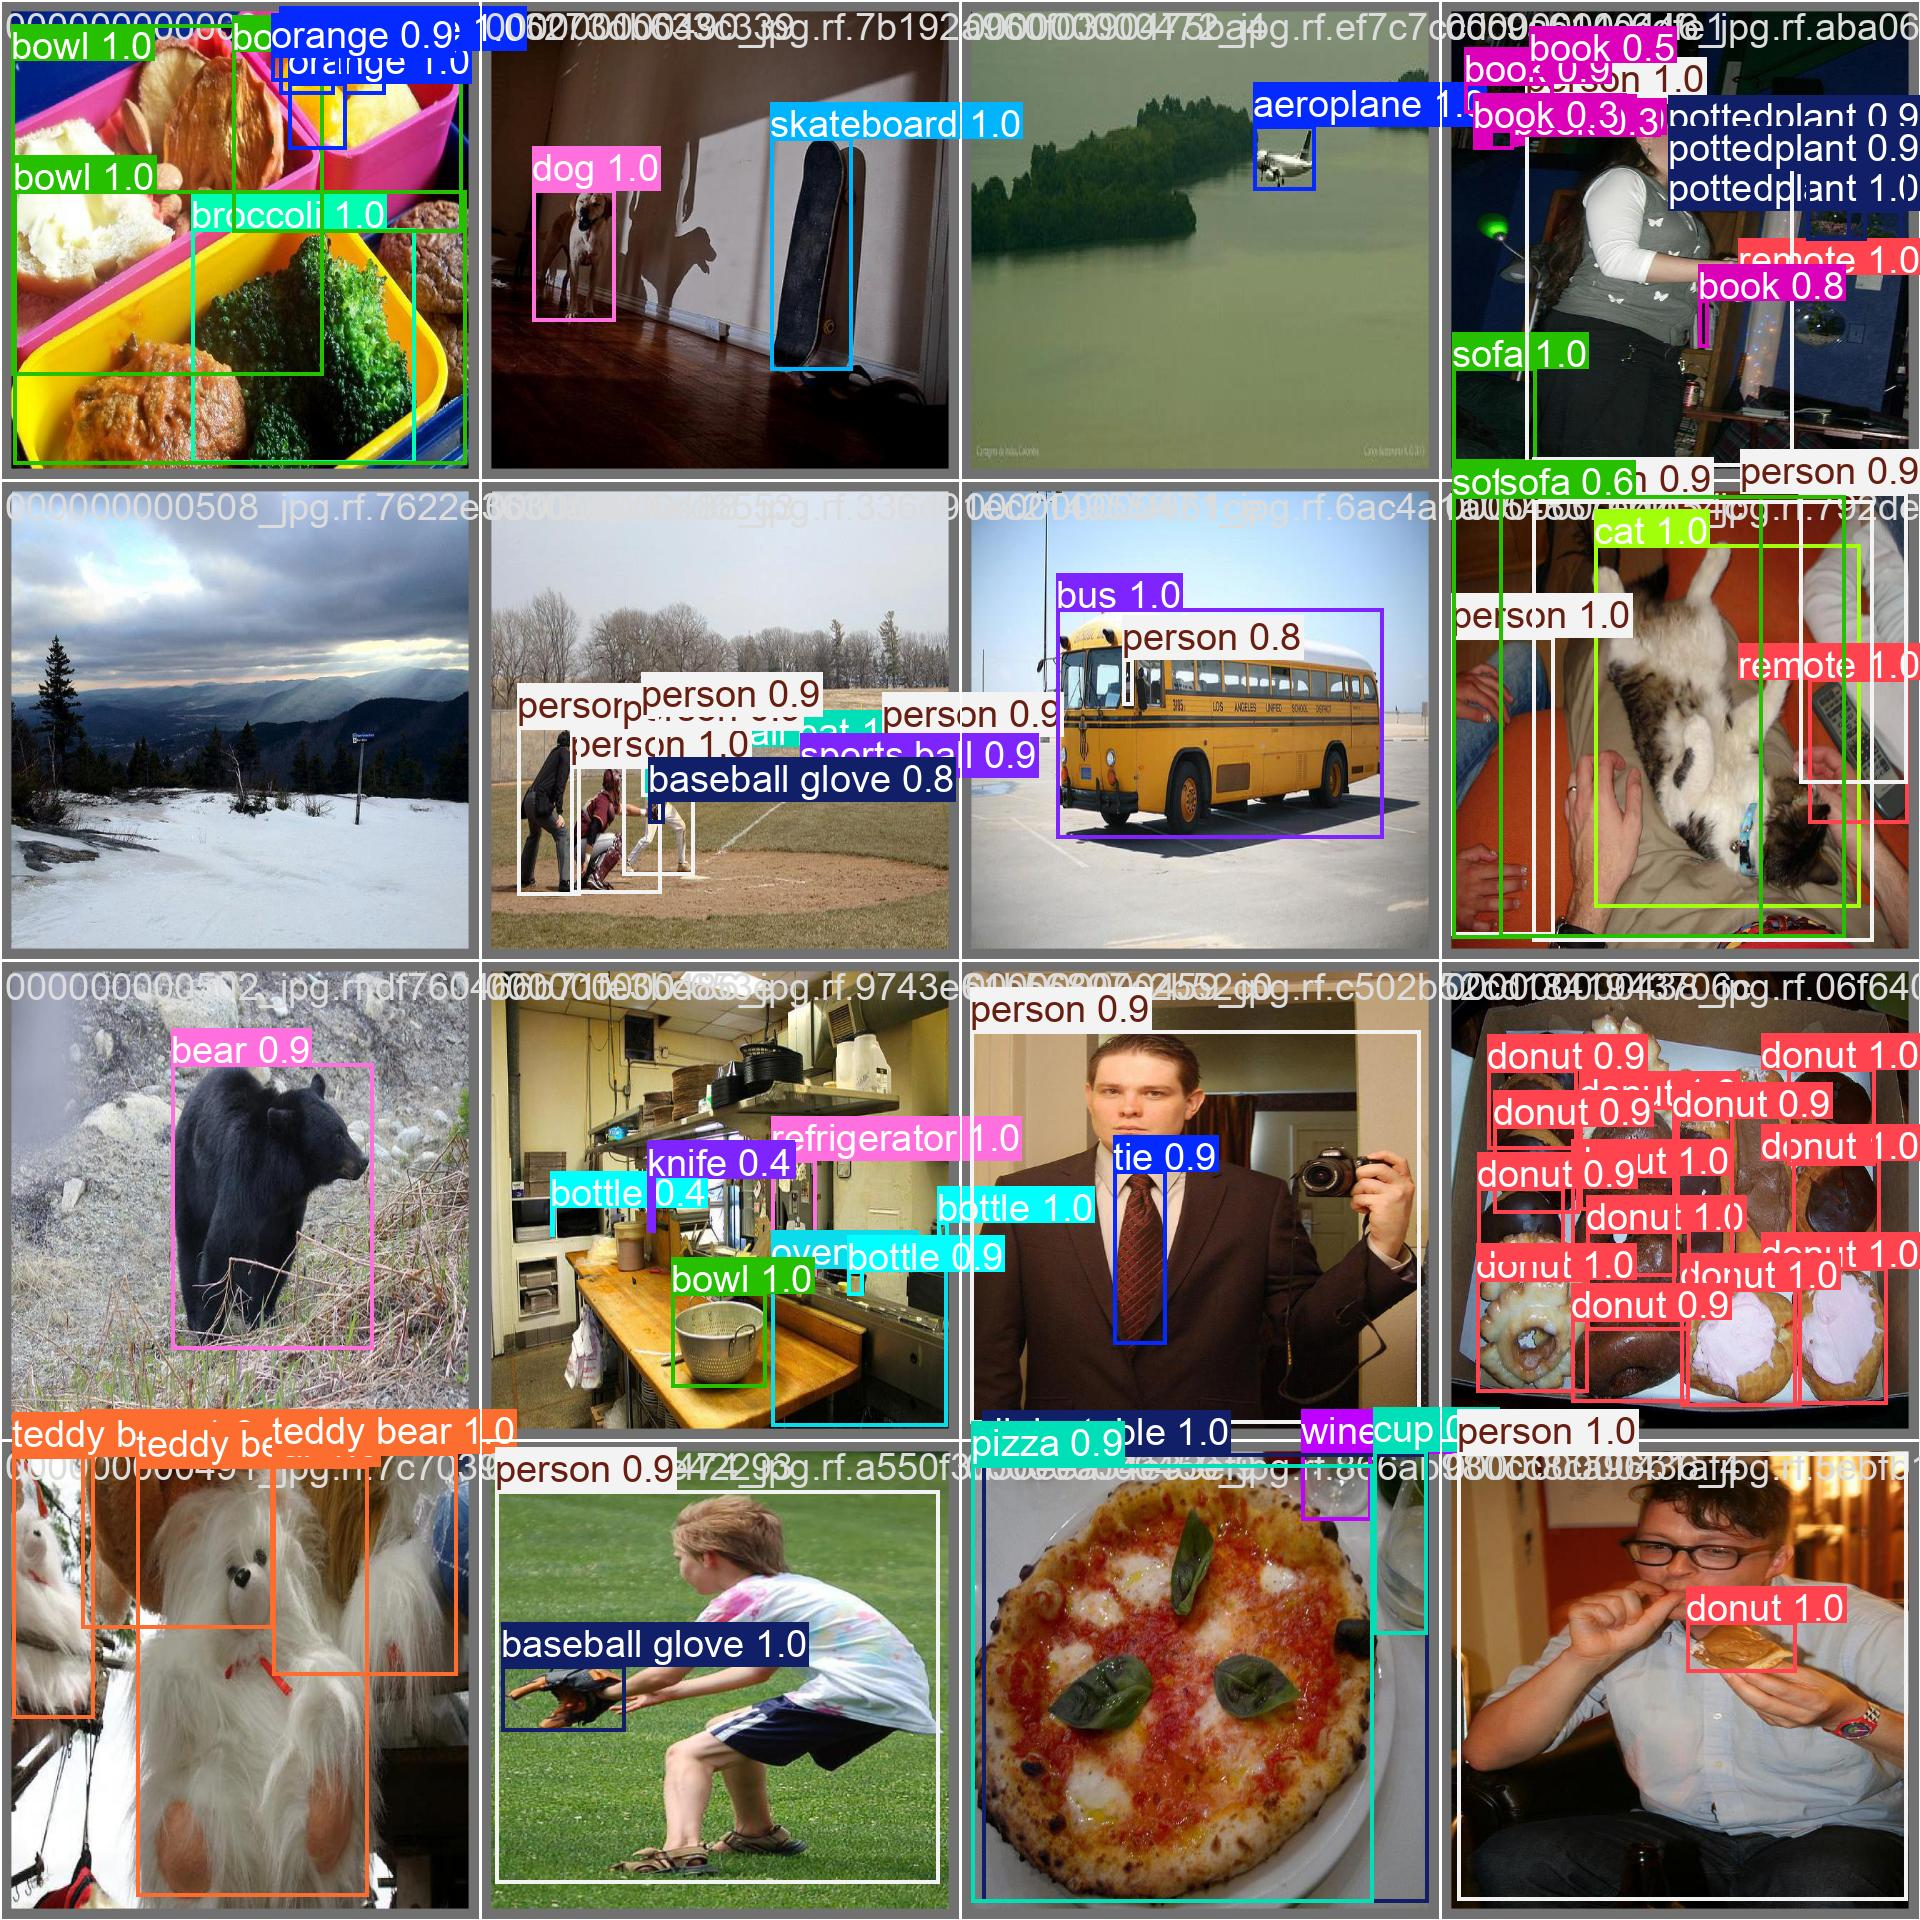

In [ ]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=800)

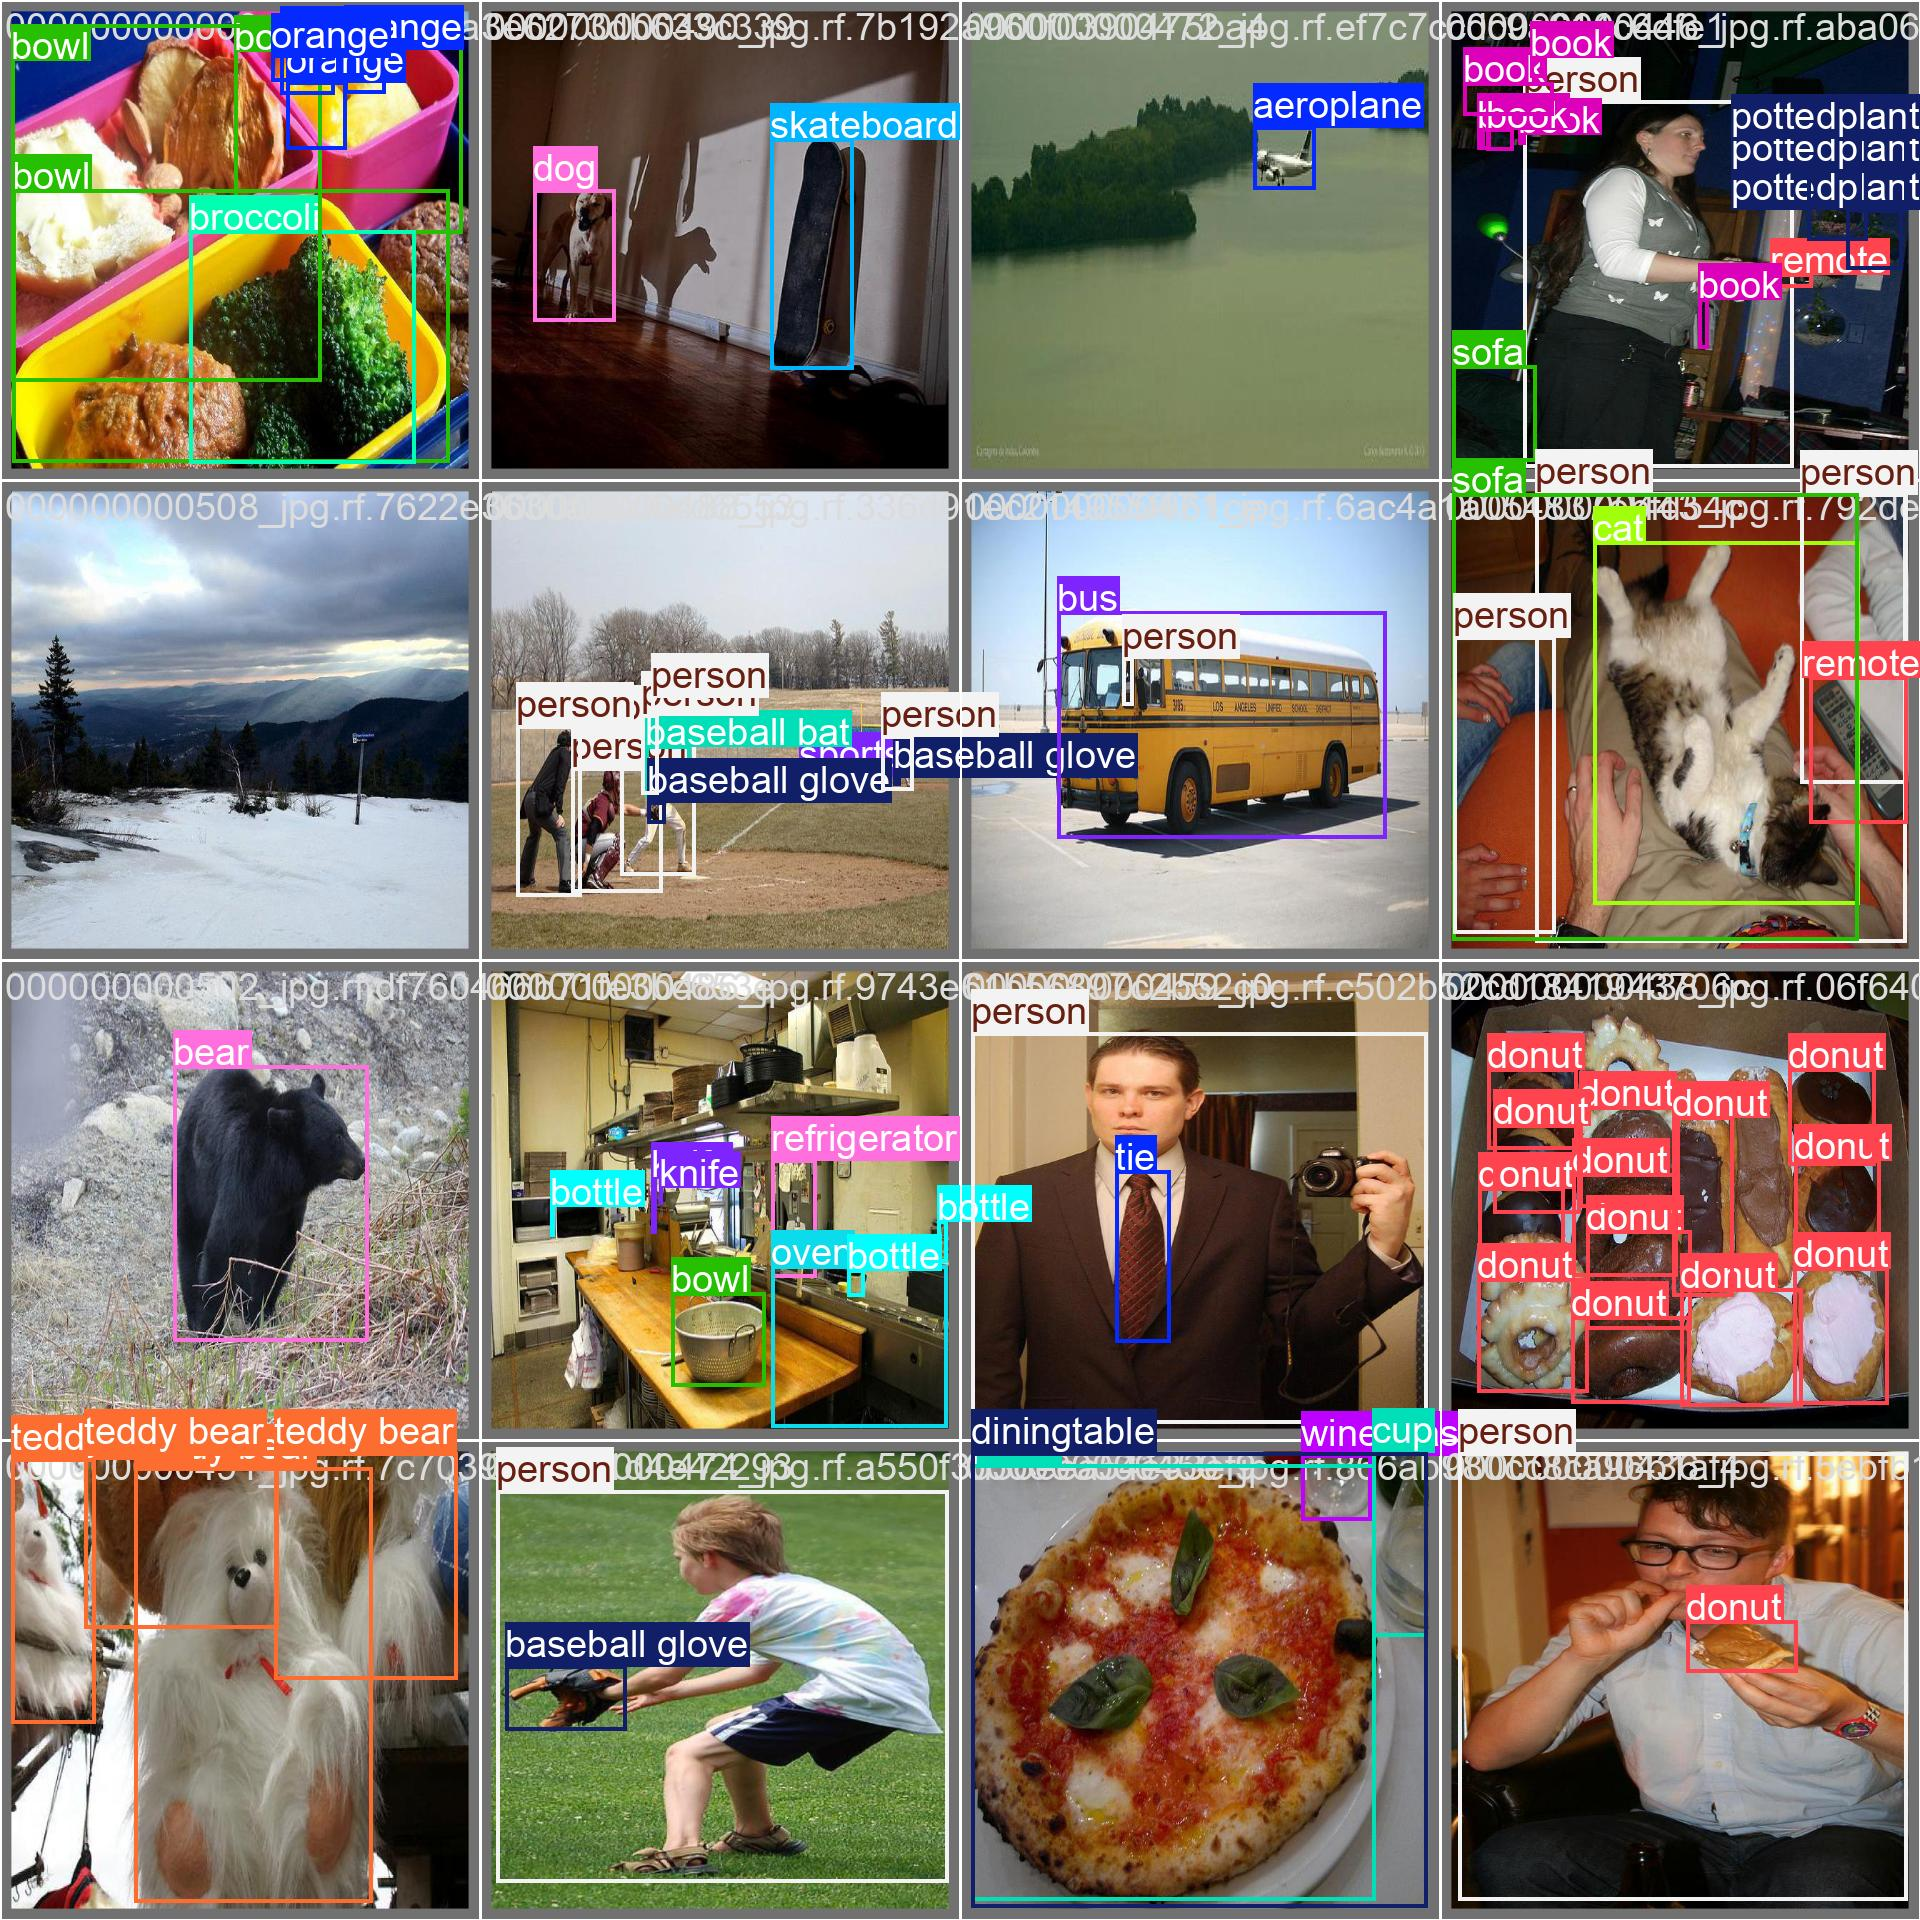

In [ ]:
Image("/content/runs/detect/train/val_batch0_labels.jpg" , width=800)

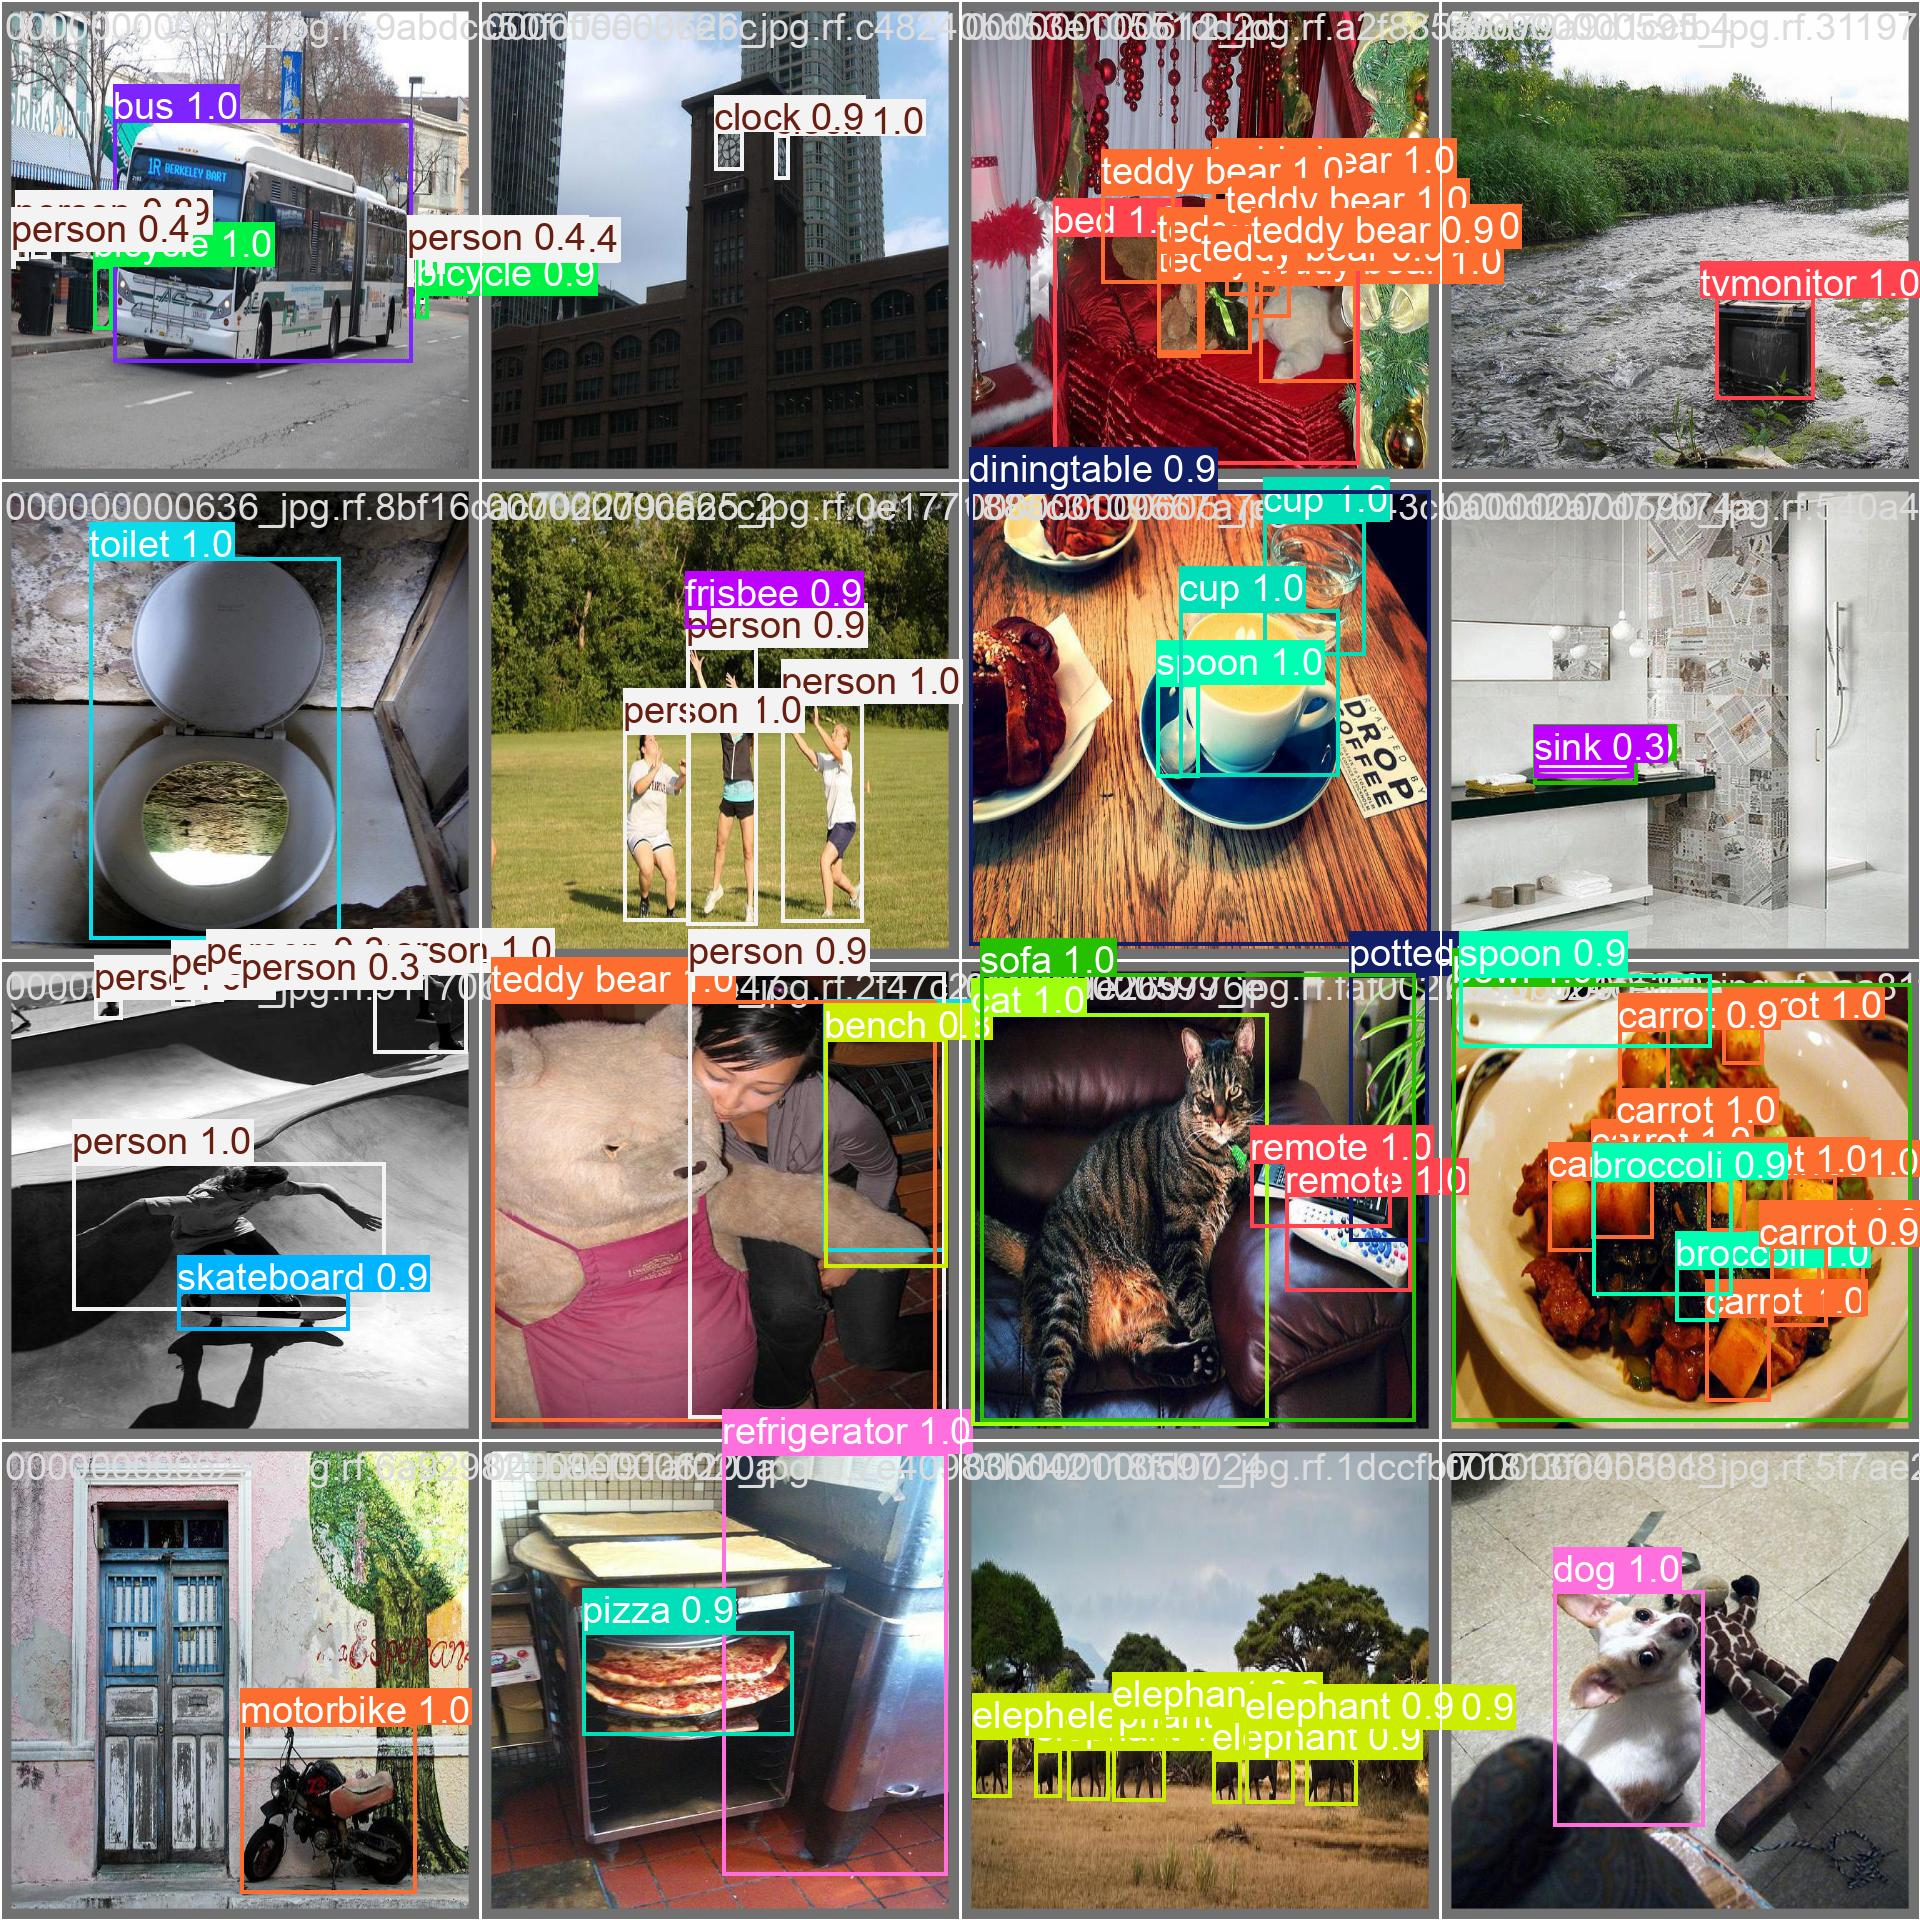

In [ ]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=800)

In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml


Ultralytics 8.3.64 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,084,773 parameters, 0 gradients, 68.0 GFLOPs
val: Scanning /content/COCO-128-2/valid/labels.cache... 123 images, 2 backgrounds, 0 corrupt: 100% 123/123 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:06<00:00,  1.28it/s]
                   all        123        904      0.948      0.916      0.972      0.887
             aeroplane          5          6      0.954          1      0.995      0.995
              backpack          4          6      0.957      0.833      0.866      0.804
                banana          1          1      0.825          1      0.995      0.995
          baseball bat          4          4          1      0.937      0.995      0.701
        baseball glove          4          7          1      0.525      0.905      0.634
                  bear          1          1      0

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True


Ultralytics 8.3.64 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,084,773 parameters, 0 gradients, 68.0 GFLOPs

image 1/127 /content/COCO-128-2/test/images/000000000009_jpg.rf.6acc173402df5523069e146edb03ff4b.jpg: 640x640 3 bowls, 1 broccoli, 4 oranges, 37.1ms
image 2/127 /content/COCO-128-2/test/images/000000000025_jpg.rf.ed74f70d3b9ede1832934740b7ac60c7.jpg: 640x640 2 giraffes, 1 person, 37.3ms
image 3/127 /content/COCO-128-2/test/images/000000000030_jpg.rf.9b6a40cdb2346d232072517b865b4846.jpg: 640x640 1 pottedplant, 1 vase, 37.2ms
image 4/127 /content/COCO-128-2/test/images/000000000034_jpg.rf.b518abdaed199dcb88854cf20fce8078.jpg: 640x640 1 zebra, 37.2ms
image 5/127 /content/COCO-128-2/test/images/000000000036_jpg.rf.236f23e769287f9219fc898a1ab9e716.jpg: 640x640 1 person, 1 umbrella, 37.1ms
image 6/127 /content/COCO-128-2/test/images/000000000042_jpg.rf.49cb642017295e9511dadffcbc1f3d82.jpg: 640x640 1 dog, 37.2ms
image 7/127 /co

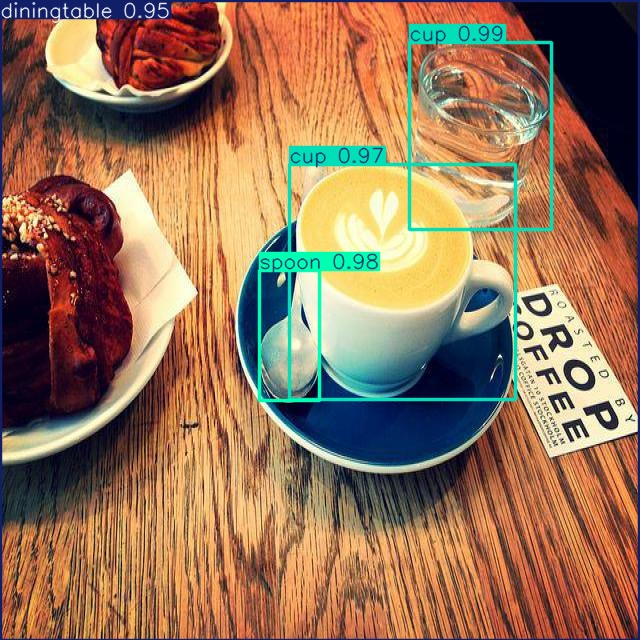

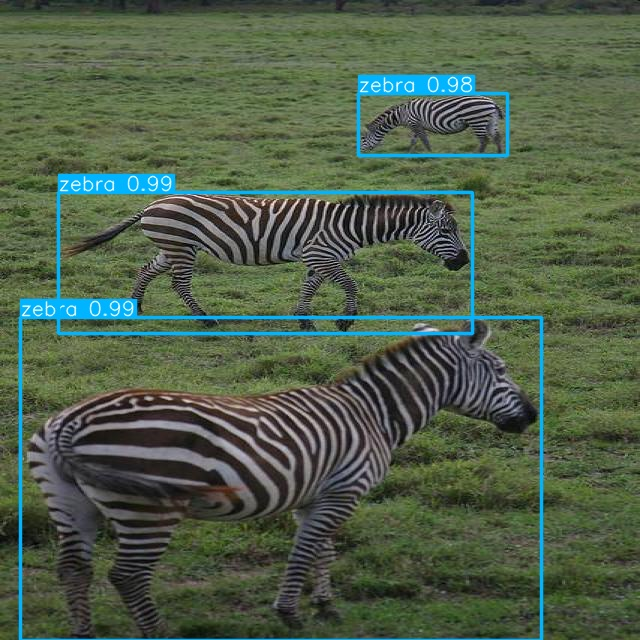

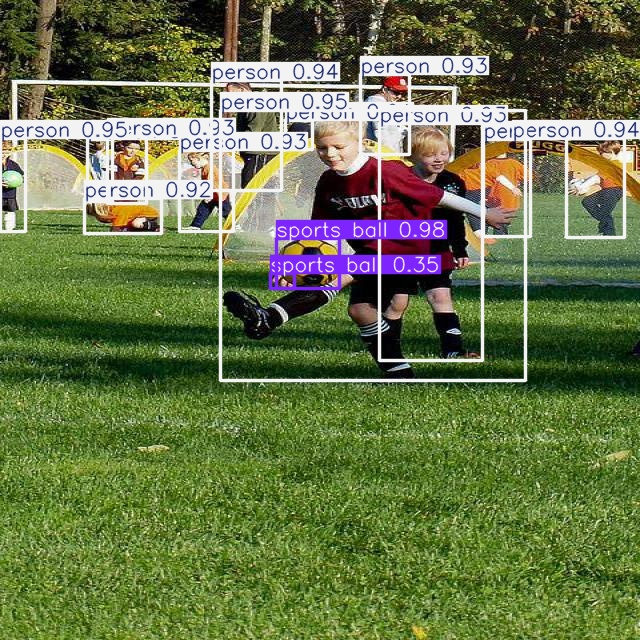

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[24:27]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/trafik2.jpg" save=True

Ultralytics 8.3.64 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,084,773 parameters, 0 gradients, 68.0 GFLOPs

image 1/1 /content/trafik2.jpg: 384x640 4 cars, 1 motorbike, 2 persons, 104.5ms
Speed: 7.8ms preprocess, 104.5ms inference, 634.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


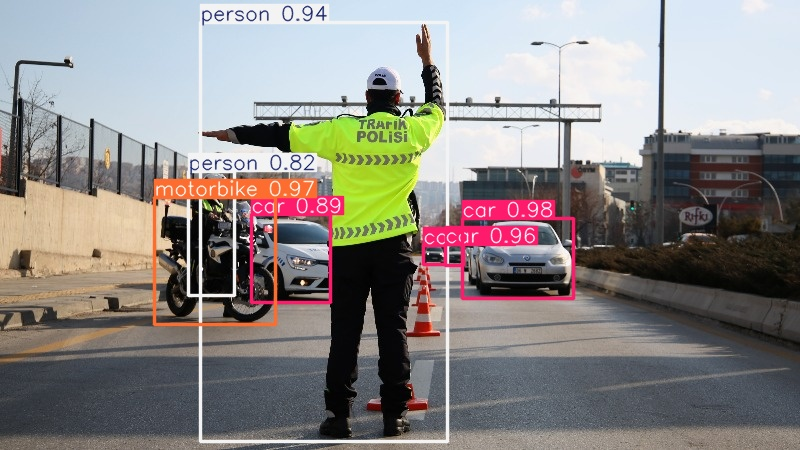

In [ ]:
Image("/content/runs/detect/predict2/trafik2.jpg", width=600)

In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/video1.mp4" save=True


Ultralytics 8.3.64 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,084,773 parameters, 0 gradients, 68.0 GFLOPs

video 1/1 (frame 1/437) /content/video1.mp4: 384x640 1 backpack, 1 bicycle, 3 cars, 2 persons, 1 traffic light, 65.1ms
video 1/1 (frame 2/437) /content/video1.mp4: 384x640 1 backpack, 1 bicycle, 3 cars, 2 persons, 1 traffic light, 24.2ms
video 1/1 (frame 3/437) /content/video1.mp4: 384x640 1 backpack, 1 bicycle, 3 cars, 2 persons, 1 traffic light, 24.1ms
video 1/1 (frame 4/437) /content/video1.mp4: 384x640 1 bicycle, 3 cars, 2 persons, 1 traffic light, 24.1ms
video 1/1 (frame 5/437) /content/video1.mp4: 384x640 1 bicycle, 3 cars, 2 persons, 2 traffic lights, 24.1ms
video 1/1 (frame 6/437) /content/video1.mp4: 384x640 1 bicycle, 3 cars, 2 persons, 2 traffic lights, 21.7ms
video 1/1 (frame 7/437) /content/video1.mp4: 384x640 1 backpack, 1 bicycle, 4 cars, 1 person, 2 traffic lights, 18.4ms
video 1/1 (frame 8/437) /content/

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Giriş ve çıkış dosya yolları
save_path = '/content/runs/detect/predict4/video1.avi'
compressed_path = "/content/PPE_Part1.mp4"

# ffmpeg ile sıkıştırma işlemi
os.system(f"ffmpeg -i '{save_path}' -vcodec libx264 '{compressed_path}'")

# Sıkıştırılmış dosyanın varlığını kontrol et
if os.path.exists(compressed_path):
    print("Sıkıştırılmış video başarıyla oluşturuldu.")
    # Video gösterimi
    mp4 = open(compressed_path, 'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    display(HTML(f"""
    <video width=1000 controls>
          <source src="{data_url}" type="video/mp4">
    </video>
    """))
else:
    print("Sıkıştırma işlemi başarısız oldu.")


Sıkıştırılmış video başarıyla oluşturuldu.
